# Mobile Price Classification - a Machine Learning Project

## Using Machine Learning Classifier Algorithms to achieve a 99.75 success rate

This project looks at various categories that influence the price of a particular phone. 

Price is given in the form of a range - 0 (lowest), 1 (mid), 2 (upper) and 3 (highest) range. Categories have all been given their individual values and are represented for the most part in integer values. 

What I am going to do witht his project is to start with cleaning the dataset, presenting the dataset in the form of a range constituting integer values, and use that as means to define my machine learning algorithm of choice. 

I am going to divide this project into 3 parts -
* Data Wrangling / Cleaning
* Data Visualization
* Machine Learning

For Data Wrangling and Cleaning, I will be using pandas and numpy libraries offered by Python to perform relatively simple tasks all revolving around grouping and restructuring data. 

For Data Visualization, I am going to stick to seaborn as upon first glance, this dataset does not require any fancy graphs to provide explanations. However, I will import matplotlib and plotly just for backup. 

For Machine Learning, I am going to stick to the 7 most popular classifier algorithms - 
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Classifier (SVC)
* K Neighbour or K-Nearest Neighbour Classifier
* Gaussian Naive Bayes Classifier
* Perceptron Classifier
* Stochastic Gradient Descent (SGD) Classifier

Hopefully, this will give us the result that we nee in order to make the best prediction for given test dataset. 

### Import Libraries and Dataset

We start off the process by importing the functions and libraries we require, and the dataset we will implement them on. We will import along the lines of the categories I previously listed. 

In [1]:
#for data wrangling / cleaning
import pandas as pd
import numpy as np
import math
print("Data Wrangling / Cleaning Libraries Imported Successfully")

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
print("Data Visualization Libraries Imported Successfully")

#for machine learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
print("Machine Learning Libraries Imported Successfully")

Data Wrangling / Cleaning Libraries Imported Successfully
Data Visualization Libraries Imported Successfully
Machine Learning Libraries Imported Successfully


Now that we have imported the libraries, we move onto importing the dataset. Since there are two datasets available, **train** and **test**, we will register both of them to separate variables of their own and create a concatenated dataset, called **data**. 

In [2]:
#import datasets using filepath
filepath_test = "../input/mobile-price-classification/test.csv"
filepath_train = "../input/mobile-price-classification/train.csv"

#assign datasets to variable
train = pd.read_csv(filepath_train)
test = pd.read_csv(filepath_test)

#concatenate the two datasets into one
data = pd.concat([train, test])

#view the first 10 values of the data dataset
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1654,1067,17,1,10,1,0,0,1.0,NaN
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,1018,3220,13,8,18,1,0,1,3.0,NaN
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,1149,700,16,3,5,1,1,1,0.0,NaN
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,836,1099,17,1,20,1,0,0,0.0,NaN
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1224,513,19,10,12,1,0,0,0.0,NaN


In [3]:
#view the first 10 values of the train dataset
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
#view the first 10 values of the test dataset
test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


We have successfully completed importing the libraries and the datasets. Now it is time for a bit of data cleaning. 

### Data Wrangling / Cleaning

This is a relatively big dataset, at least in terms of columns. Not all columns are visible to us (denoted by the 3 dots in the middle of the dataset) and therefore we will not be able to accurately clean data unless we know the columns that are present in the dataset. 

Hence, we first start off by looking at the list of columns in the dataset. 

In [5]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'id'],
      dtype='object')

The columns that are represented in the dataset have the following meaning - 
* **battery_power**: Total energy a battery can store in one time (in mAh)
* **blue**: Has bluetooth or not
* **clock_speed**: speed at which microprocessor executes instructions
* **dual_sim**: Has dual sim support or not
* **fc**: Front Camera Resolution (in mp)
* **four_g**: Has 4G or not
* **int_memory**: Internal Memory (in GB)
* **m_dep**: Mobile Depth in cm
* **mobile_wt**: Weight of mobile phone
* **n_cores**: Number of Processing Cores
* **pc**: Primary Camera Resolution (in mp)
* **px_height**: Pixel Resolution Height
* **px_width**: Pixel Resolution Width
* **ram**: Random Access Memory (in MB)
* **sc_h**: Screen Height of mobile (in cm)
* **sc_w**: Screen Width of mobile (in cm)
* **talk_time**: longest time that a single battery charge will last when you are
* **three_g**: Has 3G or not
* **touch_screen**: Has touch screen or not
* **wifi**: Has wifi or not
* **price_range**: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In order to make sure that all the values present in the dataset are of a numeric or integer nature, we will convert the entire data to a nueric datatype. 

We will follow that up by removing columns that are of no use to us - 'm_dep', 'mobile_wt', 'px_height', 'px_width', 'three_g', 'n_cores', 'talk_time'

In [6]:
# to convert to numeric datatype
cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi', 'price_range']
train[cols] = train[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# remove columns from dataset
train = train.drop(['m_dep', 'mobile_wt', 'px_height', 'px_width', 'n_cores', 'talk_time'], axis=1)
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,2.0,2549.0,9.0,7.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,6.0,2631.0,17.0,3.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,6.0,2603.0,11.0,2.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,9.0,2769.0,16.0,8.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,14.0,1411.0,8.0,2.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,14.0,668.0,13.0,4.0,1.0,1.0,0.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,3.0,2032.0,11.0,10.0,1.0,1.0,1.0,2.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,3.0,3057.0,9.0,1.0,1.0,1.0,0.0,3.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,5.0,869.0,18.0,10.0,1.0,1.0,1.0,0.0


We have two columns to denote the size of the phone - screen height and screen width. We can use these two columns to present the size of the phone as a singular value. 

Phone screen size is usually measured in a diagonal fashion, and so we can do the same in this case. 

Now that we know the height and width of the phone, we can simply use a bit of Pythagoras Theorem in order to calculate the value of the diagonal. 

diagonal^2 = height^2 + width^2

In [7]:
#to calculate the diagonal size of the phone
train['ph_size'] = np.sqrt(train["sc_h"]**2 + train["sc_w"]**2)
train['ph_size'] = train['ph_size'].round(decimals=1)
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range,ph_size
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,2.0,2549.0,9.0,7.0,0.0,0.0,1.0,1.0,11.4
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,6.0,2631.0,17.0,3.0,1.0,1.0,0.0,2.0,17.3
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,6.0,2603.0,11.0,2.0,1.0,1.0,0.0,2.0,11.2
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,9.0,2769.0,16.0,8.0,1.0,0.0,0.0,2.0,17.9
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,14.0,1411.0,8.0,2.0,1.0,1.0,0.0,1.0,8.2


The data that is present in the dataset is spread across various limits, some going as high as 2000 and beyond. This would make it difficult to get an accurate prediction, hence a lesser rate of success. 

We can start off by bringing all the values in each individual dataset column within a range. Since we already have a range reference with the price, we know that in order to create a range for each column, we need to group the individual columns within 4 divisions. 

Certain columns have used 0 and 1 in order to present a 'Yes' and 'No' type valuation. These columns will be left as they are. 

These ranges are going to be extremely important for both **data visualization** and **machine learning**. 

In [8]:
# dividing and grouping column battery_power
train['BatteryBand'] = pd.cut(train['battery_power'], 4)
bb = train[['BatteryBand', 'price_range']].groupby(['BatteryBand'], as_index=False).mean().sort_values(by='BatteryBand', ascending=True)

# dividing and grouping column clock_speed
train['clockBand'] = pd.cut(train['clock_speed'], 4)
cb = train[['clockBand', 'price_range']].groupby(['clockBand'], as_index=False).mean().sort_values(by='clockBand', ascending=True)

# dividing and grouping column fc
train['fcBand'] = pd.cut(train['fc'], 4)
fb = train[['fcBand', 'price_range']].groupby(['fcBand'], as_index=False).mean().sort_values(by='fcBand', ascending=True)

# dividing and grouping column int_memory
train['intmemBand'] = pd.cut(train['int_memory'], 4)
ib = train[['intmemBand', 'price_range']].groupby(['intmemBand'], as_index=False).mean().sort_values(by='intmemBand', ascending=True)

# dividing and grouping column pc
train['pcBand'] = pd.cut(train['pc'], 4)
pb = train[['pcBand', 'price_range']].groupby(['pcBand'], as_index=False).mean().sort_values(by='pcBand', ascending=True)

# dividing and grouping column ph_size
train['sizeBand'] = pd.cut(train['ph_size'], 4)
sb = train[['sizeBand', 'price_range']].groupby(['sizeBand'], as_index=False).mean().sort_values(by='sizeBand', ascending=True)

# dividing and grouping column ram
train['ramBand'] = pd.cut(train['ram'], 4)
rb = train[['ramBand', 'price_range']].groupby(['ramBand'], as_index=False).mean().sort_values(by='ramBand', ascending=True)

# grouping column blue
blb = train[['blue', 'price_range']].groupby(['blue'], as_index=False).mean()

# grouping column dual_sim
dsb = train[['dual_sim', 'price_range']].groupby(['dual_sim'], as_index=False).mean()

# grouping column four_g
fob = train[['four_g', 'price_range']].groupby(['four_g'], as_index=False).mean()

# grouping column touch_screen
tsb = train[['touch_screen', 'price_range']].groupby(['touch_screen'], as_index=False).mean()

# grouping column wifi
wfb = train[['wifi', 'price_range']].groupby(['wifi'], as_index=False).mean()

# printing results
print(bb, '\n')
print(cb, '\n')
print(fb, '\n')
print(ib, '\n')
print(pb, '\n')
print(sb, '\n')
print(blb, '\n')
print(dsb, '\n')
print(fob, '\n')
print(tsb, '\n')
print(wfb, '\n')

         BatteryBand  price_range
0  (499.503, 875.25]     1.256983
1   (875.25, 1249.5]     1.311983
2  (1249.5, 1623.75]     1.644172
3  (1623.75, 1998.0]     1.808163 

        clockBand  price_range
0  (0.498, 1.125]     1.463415
1   (1.125, 1.75]     1.612091
2   (1.75, 2.375]     1.570025
3    (2.375, 3.0]     1.393285 

           fcBand  price_range
0  (-0.019, 4.75]     1.491329
1     (4.75, 9.5]     1.509881
2    (9.5, 14.25]     1.477064
3   (14.25, 19.0]     1.661538 

      intmemBand  price_range
0  (1.938, 17.5]     1.472072
1   (17.5, 33.0]     1.408284
2   (33.0, 48.5]     1.597374
3   (48.5, 64.0]     1.536383 

         pcBand  price_range
0  (-0.02, 5.0]     1.441016
1   (5.0, 10.0]     1.508380
2  (10.0, 15.0]     1.460000
3  (15.0, 20.0]     1.599567 

        sizeBand  price_range
0  (4.979, 10.3]     1.479132
1   (10.3, 15.6]     1.453925
2   (15.6, 20.9]     1.518283
3   (20.9, 26.2]     1.650538 

   blue  price_range
0   0.0     1.477228
1   1.0     1.523232 

We have successfully completed cleaning and wrangling our data. Now its time to explore Data Visualization. 

### Data Visualization

There are multiple values within the dataset that present conflicting results, and therefore we will not get the best graph that easily explains our parameters. 

Rather than using the values from the dataset, we can use the range we calculated earlier. 

This range will help us define the graph better and compare in an easier manner to the price. 

#### Comparing Battery Size to the Price Range

This bar graph will help us visualise the price range for the battery power available in any device. It will also help us analyse the relation between the battery size and price of the device. 

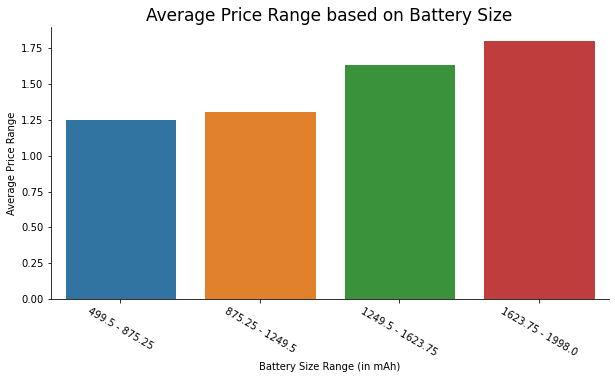

In [9]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='BatteryBand', y='price_range', data=bb.reset_index(), label="BatteryBand", ax=ax)
ax.set_title("Average Price Range based on Battery Size", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Battery Size Range (in mAh)")
ax.set_xticklabels(['499.5 - 875.25', '875.25 - 1249.5', '1249.5 - 1623.75', '1623.75 - 1998.0'], rotation=-30)
plt.show()

#### Comparing Clock Speed to the Price Range

This bar graph will help us visualise the price range for the clock speed available in any device. It will also help us analyse the relation between the clock speed and price of the device. 

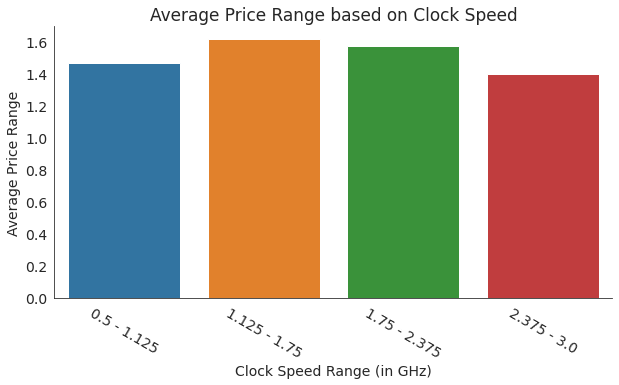

In [10]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='clockBand', y='price_range', data=cb.reset_index(), label="clockBand", ax=ax)
ax.set_title("Average Price Range based on Clock Speed", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Clock Speed Range (in GHz)")
ax.set_xticklabels(['0.5 - 1.125', '1.125 - 1.75', '1.75 - 2.375', '2.375 - 3.0'], rotation=-30)
plt.show()

#### Comparing Primary Camera Resolution to Price Range

This bar graph will help us visualise the price range for the primary camera resolution available in any device. It will also help us analyse the relation between the primary camera resolution and price of the device. 

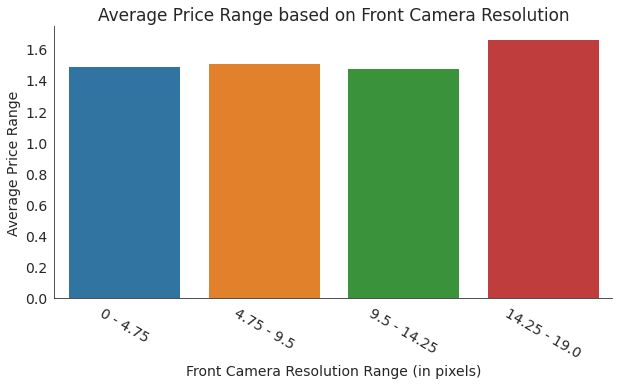

In [11]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='fcBand', y='price_range', data=fb.reset_index(), label="fcBand", ax=ax)
ax.set_title("Average Price Range based on Front Camera Resolution", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Front Camera Resolution Range (in pixels)")
ax.set_xticklabels(['0 - 4.75', '4.75 - 9.5', '9.5 - 14.25', '14.25 - 19.0'], rotation=-30)
plt.show()

#### Comparing Internal Memory to Price Range

This bar graph will help us visualise the price range for the internal memory available in any device. It will also help us analyse the relation between the internal memory and price of the device. 

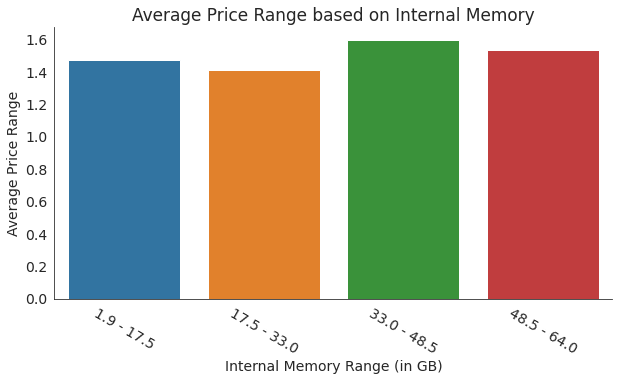

In [12]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='intmemBand', y='price_range', data=ib.reset_index(), label="intmemBand", ax=ax)
ax.set_title("Average Price Range based on Internal Memory", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Internal Memory Range (in GB)")
ax.set_xticklabels(['1.9 - 17.5', '17.5 - 33.0', '33.0 - 48.5', '48.5 - 64.0'], rotation=-30)
plt.show()

#### Comparing Primary Camera Resolution to Price Range

This bar graph will help us visualise the primary camera resolution for the battery power available in any device. It will also help us analyse the relation between the primary camera resolution and price of the device. 

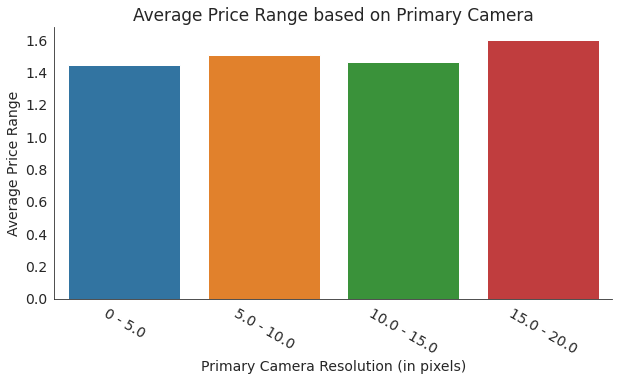

In [13]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='pcBand', y='price_range', data=pb.reset_index(), label="pcBand", ax=ax)
ax.set_title("Average Price Range based on Primary Camera", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Primary Camera Resolution (in pixels)")
ax.set_xticklabels(['0 - 5.0', '5.0 - 10.0', '10.0 - 15.0', '15.0 - 20.0'], rotation=-30)
plt.show()

#### Comparing Screen Size (in **cm**) to Price Range 

This bar graph will help us visualise the price range for the screen size available on any device. It will also help us analyse the relation between the screen size and price of the device. 

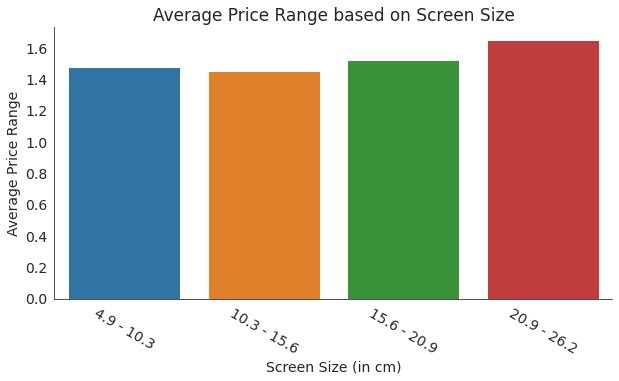

In [14]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='sizeBand', y='price_range', data=sb.reset_index(), label="sizeBand", ax=ax)
ax.set_title("Average Price Range based on Screen Size", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Screen Size (in cm)")
ax.set_xticklabels(['4.9 - 10.3', '10.3 - 15.6', '15.6 - 20.9', '20.9 - 26.2'], rotation=-30)
plt.show()

#### Comparing Availability of Bluetooth to Price Range

This bar graph will help us visualise the relation that presence of bluetooth within the device has on the price of the device. 

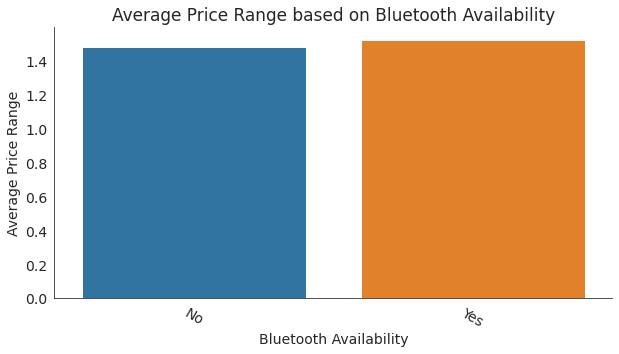

In [15]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='blue', y='price_range', data=blb.reset_index(), label="blue", ax=ax)
ax.set_title("Average Price Range based on Bluetooth Availability", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Bluetooth Availability")
ax.set_xticklabels(['No', 'Yes'], rotation=-30)
plt.show()

#### Comparing Availability of Dual SIM to Price Range

This bar graph will help us visualise the relation that presence of dual SIM support within the device has on the price of the device. 

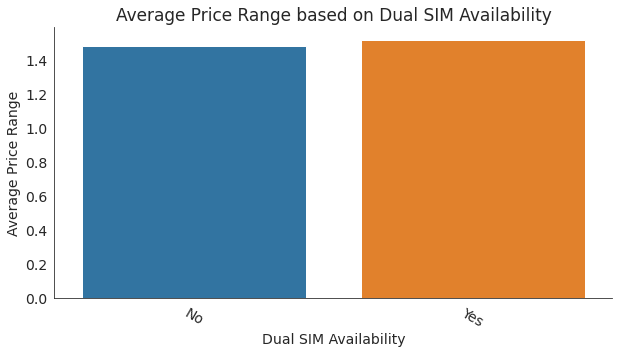

In [16]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='dual_sim', y='price_range', data=dsb.reset_index(), label="dual_sim", ax=ax)
ax.set_title("Average Price Range based on Dual SIM Availability", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Dual SIM Availability")
ax.set_xticklabels(['No', 'Yes'], rotation=-30)
plt.show()

#### Comparing Availability of 4G to Price Range

This bar graph will help us visualise the relation that presence of 4G connection within the device has on the price of the device. 

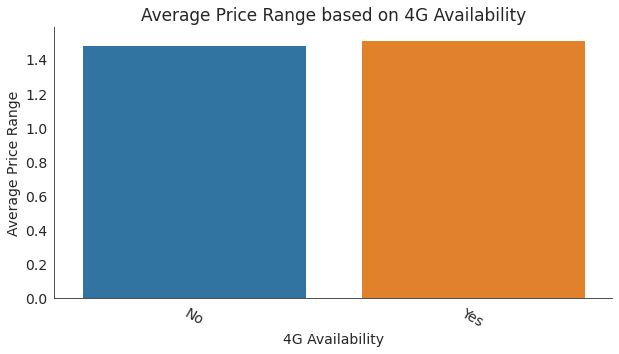

In [17]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='four_g', y='price_range', data=fob.reset_index(), label="four_g", ax=ax)
ax.set_title("Average Price Range based on 4G Availability", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("4G Availability")
ax.set_xticklabels(['No', 'Yes'], rotation=-30)
plt.show()

#### Comparing Availability of Touchscreen to Price Range 

This bar graph will help us visualise the relation that a touchscreen device has on the price of the device. 

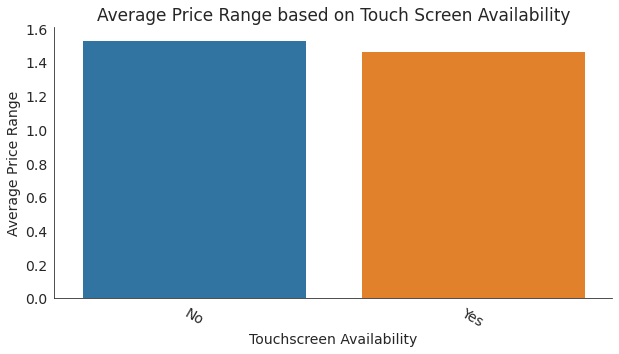

In [18]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='touch_screen', y='price_range', data=tsb.reset_index(), label="touch_screen", ax=ax)
ax.set_title("Average Price Range based on Touch Screen Availability", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("Touchscreen Availability")
ax.set_xticklabels(['No', 'Yes'], rotation=-30)
plt.show()

#### Comparing Availability of WiFi to Price Range

This bar graph will help us visualise the relation that presence of WiFi support within the device has on the price of the device. 

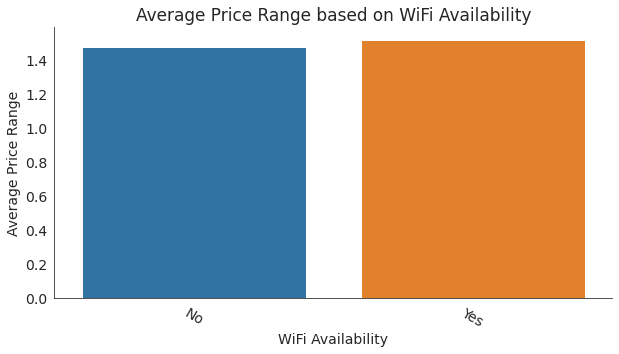

In [19]:
#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=14

sns.despine()
sns.set_style("white")
sns_battery_price = sns.barplot(x='wifi', y='price_range', data=wfb.reset_index(), label="wifi", ax=ax)
ax.set_title("Average Price Range based on WiFi Availability", fontsize=17)
ax.set_ylabel("Average Price Range")
ax.set_xlabel("WiFi Availability")
ax.set_xticklabels(['No', 'Yes'], rotation=-30)
plt.show()

Now that we have successfully completed our data visualization, a few key things to note - 

* Greater the battery size, greater the price range

* There is a sudden rise in price range for devices with primary camera resolution beyond 15MP
* There is a sudden rise in price range for devices with front camera resolution beyond 14MP
* There is a sudden rise in price range for devices with screen size beyond 20.9cm (8inch)

* No particular inference can be brought about with respect to clock speed
* No particular inference can be brought about with respect to internal memory

* There is a marginal rise in price for any device containing Bluetooth, WiFi, 4G and Dual SIM
* Touchscreen is the only category where the lack of that feature on that device incurs a greater price. 

We can now move onto creating price range predictions for the test dataset, using machine learning classifiers. 

### Machine Learning and Classification

Withing this subsection we are going to assign a price range to the devices present in the test dataset, based on predictions using values we encountered in the training dataset. 

For the most successful prediction of the test dataset, we will be using 7 key classification algorithms - 

* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Classifier (SVC)
* K Neighbour or K-Nearest Neighbour Classifier
* Gaussian Naive Bayes Classifier
* Perceptron Classifier
* Stochastic Gradient Descent (SGD) Classifier

But before we get into the classification process, we first need to have a look at the dataset. 



In [20]:
# view the first 10 values of the train dataset
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,sc_h,...,wifi,price_range,ph_size,BatteryBand,clockBand,fcBand,intmemBand,pcBand,sizeBand,ramBand
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,2.0,2549.0,9.0,...,1.0,1.0,11.4,"(499.503, 875.25]","(1.75, 2.375]","(-0.019, 4.75]","(1.938, 17.5]","(-0.02, 5.0]","(10.3, 15.6]","(2127.0, 3062.5]"
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,6.0,2631.0,17.0,...,0.0,2.0,17.3,"(875.25, 1249.5]","(0.498, 1.125]","(-0.019, 4.75]","(48.5, 64.0]","(5.0, 10.0]","(15.6, 20.9]","(2127.0, 3062.5]"
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,6.0,2603.0,11.0,...,0.0,2.0,11.2,"(499.503, 875.25]","(0.498, 1.125]","(-0.019, 4.75]","(33.0, 48.5]","(5.0, 10.0]","(10.3, 15.6]","(2127.0, 3062.5]"
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,9.0,2769.0,16.0,...,0.0,2.0,17.9,"(499.503, 875.25]","(2.375, 3.0]","(-0.019, 4.75]","(1.938, 17.5]","(5.0, 10.0]","(15.6, 20.9]","(2127.0, 3062.5]"
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,14.0,1411.0,8.0,...,0.0,1.0,8.2,"(1623.75, 1998.0]","(1.125, 1.75]","(9.5, 14.25]","(33.0, 48.5]","(10.0, 15.0]","(4.979, 10.3]","(1191.5, 2127.0]"
5,1859.0,0.0,0.5,1.0,3.0,0.0,22.0,7.0,1067.0,17.0,...,0.0,1.0,17.0,"(1623.75, 1998.0]","(0.498, 1.125]","(-0.019, 4.75]","(17.5, 33.0]","(5.0, 10.0]","(15.6, 20.9]","(252.258, 1191.5]"
6,1821.0,0.0,1.7,0.0,4.0,1.0,10.0,10.0,3220.0,13.0,...,1.0,3.0,15.3,"(1623.75, 1998.0]","(1.125, 1.75]","(-0.019, 4.75]","(1.938, 17.5]","(5.0, 10.0]","(10.3, 15.6]","(3062.5, 3998.0]"
7,1954.0,0.0,0.5,1.0,0.0,0.0,24.0,0.0,700.0,16.0,...,1.0,0.0,16.3,"(1623.75, 1998.0]","(0.498, 1.125]","(-0.019, 4.75]","(17.5, 33.0]","(-0.02, 5.0]","(15.6, 20.9]","(252.258, 1191.5]"
8,1445.0,1.0,0.5,0.0,0.0,0.0,53.0,14.0,1099.0,17.0,...,0.0,0.0,17.0,"(1249.5, 1623.75]","(0.498, 1.125]","(-0.019, 4.75]","(48.5, 64.0]","(10.0, 15.0]","(15.6, 20.9]","(252.258, 1191.5]"
9,509.0,1.0,0.6,1.0,2.0,1.0,9.0,15.0,513.0,19.0,...,0.0,0.0,21.5,"(499.503, 875.25]","(0.498, 1.125]","(-0.019, 4.75]","(1.938, 17.5]","(10.0, 15.0]","(20.9, 26.2]","(252.258, 1191.5]"


We can clearly see that the values present in the dataset are confusing.

Not to mention the ranges we declared previously are a part of this dataset too, and need to be removed. 

But before that, I will use the ranges to segregate the data along the range of (0, 1, 2, 3), just like the price column, to get a neater and more accurate dataset. 

In [21]:
# segregate battery_power
train.loc[ train['battery_power'] <= 875.25, 'battery_power'] = 0
train.loc[(train['battery_power'] > 875.25) & (train['battery_power'] <= 1249.5), 'battery_power'] = 1
train.loc[(train['battery_power'] > 1249.5) & (train['battery_power'] <= 1623.75), 'battery_power'] = 2
train.loc[ train['battery_power'] > 1623.75, 'battery_power'] = 3

# segregate clock_speed
train.loc[ train['clock_speed'] <= 1.125, 'clock_speed'] = 0
train.loc[(train['clock_speed'] > 1.125) & (train['clock_speed'] <= 1.75), 'clock_speed'] = 1
train.loc[(train['clock_speed'] > 1.75) & (train['clock_speed'] <= 2.375), 'clock_speed'] = 2
train.loc[ train['clock_speed'] > 2.375, 'clock_speed'] = 3

# segregate fc
train.loc[ train['fc'] <= 4.75, 'fc'] = 0
train.loc[(train['fc'] > 4.75) & (train['fc'] <= 9.5), 'fc'] = 1
train.loc[(train['fc'] > 9.5) & (train['fc'] <= 14.25), 'fc'] = 2
train.loc[ train['fc'] > 14.25, 'fc'] = 3

# segregate int_memory
train.loc[ train['int_memory'] <= 17.5, 'int_memory'] = 0
train.loc[(train['int_memory'] > 17.5) & (train['int_memory'] <= 33), 'int_memory'] = 1
train.loc[(train['int_memory'] > 33) & (train['int_memory'] <= 48.5), 'int_memory'] = 2
train.loc[ train['int_memory'] > 48.5, 'int_memory'] = 3

# segregate pc
train.loc[ train['pc'] <= 5, 'pc'] = 0
train.loc[(train['pc'] > 5) & (train['pc'] <= 10), 'pc'] = 1
train.loc[(train['pc'] > 10) & (train['pc'] <= 15), 'pc'] = 2
train.loc[ train['pc'] > 15, 'pc'] = 3

# segregate ram
train.loc[ train['ram'] <= 1191.5, 'ram'] = 0
train.loc[(train['ram'] > 1191.5) & (train['ram'] <= 2127), 'ram'] = 1
train.loc[(train['ram'] > 2127) & (train['ram'] <= 3062.5), 'ram'] = 2
train.loc[ train['ram'] > 3062.5, 'ram'] = 3

# segregate ph_size
train.loc[ train['ph_size'] <= 10.3, 'ph_size'] = 0
train.loc[(train['ph_size'] > 10.3) & (train['ph_size'] <= 15.6), 'ph_size'] = 1
train.loc[(train['ph_size'] > 15.6) & (train['ph_size'] <= 20.9), 'ph_size'] = 2
train.loc[ train['ph_size'] > 20.9, 'ph_size'] = 3

# drop the remaining unwanted columns
train = train.drop(['sc_h', 'sc_w', 'BatteryBand', 'clockBand', 'fcBand', 'intmemBand', 'pcBand', 'sizeBand', 'ramBand'], axis=1)

# convert the dataset to an integer type
train = train.astype(int)

#display the whole dataset
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,three_g,touch_screen,wifi,price_range,ph_size
0,0,0,2,0,0,0,0,0,2,0,0,1,1,1
1,1,1,0,1,0,1,3,1,2,1,1,0,2,2
2,0,1,0,1,0,1,2,1,2,1,1,0,2,1
3,0,1,3,0,0,0,0,1,2,1,0,0,2,2
4,3,1,1,0,2,1,2,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,1,0,1,0,2,0,1,1,0,0,1
1996,3,1,3,1,0,0,2,0,1,1,1,1,2,1
1997,3,0,0,1,0,1,2,0,2,1,1,0,3,0
1998,2,0,0,0,0,1,2,0,0,1,1,1,0,2


The dataset looks much neater, and is now ready to be used for predictions. 

But before that, we need to do the same operations we have done to the training dataset throughout this project and bring it up to the same valuations that are present in the train dataset. 

That means - 
* introduction of the diagonal screen size
* conversion of data values into ranges
* cleaning any remaining columns
* converting dataset to integer type

In [22]:
# convert screen height and width into one screen size column
test['ph_size'] = np.sqrt(test["sc_h"]**2 + test["sc_w"]**2)
test['ph_size'] = test['ph_size'].round(decimals=1)

# segregate battery_power
test.loc[ test['battery_power'] <= 875.25, 'battery_power'] = 0
test.loc[(test['battery_power'] > 875.25) & (test['battery_power'] <= 1249.5), 'battery_power'] = 1
test.loc[(test['battery_power'] > 1249.5) & (test['battery_power'] <= 1623.75), 'battery_power'] = 2
test.loc[ test['battery_power'] > 1623.75, 'battery_power'] = 3

# segregate clock_speed
test.loc[ test['clock_speed'] <= 1.125, 'clock_speed'] = 0
test.loc[(test['clock_speed'] > 1.125) & (test['clock_speed'] <= 1.75), 'clock_speed'] = 1
test.loc[(test['clock_speed'] > 1.75) & (test['clock_speed'] <= 2.375), 'clock_speed'] = 2
test.loc[ train['clock_speed'] > 2.375, 'clock_speed'] = 3

# segregate fc
test.loc[ test['fc'] <= 4.75, 'fc'] = 0
test.loc[(test['fc'] > 4.75) & (test['fc'] <= 9.5), 'fc'] = 1
test.loc[(test['fc'] > 9.5) & (test['fc'] <= 14.25), 'fc'] = 2
test.loc[ test['fc'] > 14.25, 'fc'] = 3

# segregate int_memory
test.loc[ test['int_memory'] <= 17.5, 'int_memory'] = 0
test.loc[(test['int_memory'] > 17.5) & (test['int_memory'] <= 33), 'int_memory'] = 1
test.loc[(test['int_memory'] > 33) & (test['int_memory'] <= 48.5), 'int_memory'] = 2
test.loc[ test['int_memory'] > 48.5, 'int_memory'] = 3

# segregate pc
test.loc[ test['pc'] <= 5, 'pc'] = 0
test.loc[(test['pc'] > 5) & (test['pc'] <= 10), 'pc'] = 1
test.loc[(test['pc'] > 10) & (test['pc'] <= 15), 'pc'] = 2
test.loc[ test['pc'] > 15, 'pc'] = 3

# segregate ram
test.loc[ test['ram'] <= 1191.5, 'ram'] = 0
test.loc[(test['ram'] > 1191.5) & (test['ram'] <= 2127), 'ram'] = 1
test.loc[(test['ram'] > 2127) & (test['ram'] <= 3062.5), 'ram'] = 2
test.loc[ test['ram'] > 3062.5, 'ram'] = 3

# segregate ph_size
test.loc[ test['ph_size'] <= 10.3, 'ph_size'] = 0
test.loc[(test['ph_size'] > 10.3) & (test['ph_size'] <= 15.6), 'ph_size'] = 1
test.loc[(test['ph_size'] > 15.6) & (test['ph_size'] <= 20.9), 'ph_size'] = 2
test.loc[ test['ph_size'] > 20.9, 'ph_size'] = 3

# drop the remaining unwanted columns
test = test.drop(['sc_h', 'sc_w', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'talk_time'], axis=1)

# convert the dataset to an integer type
test = test.astype(int)

# view the whole dataset
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,three_g,touch_screen,wifi,ph_size
0,1,1,1,2,1,2,0,0,3,3,0,1,0,1
1,2,0,1,0,1,0,1,3,2,3,1,0,0,0
2,3,3,1,2,0,0,0,1,0,2,0,1,1,2
3,4,2,0,3,1,3,1,1,3,3,1,1,0,0
4,5,2,0,1,0,2,1,3,3,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1,2,0,0,1,3,3,1,1,1,0,2
996,997,0,0,2,1,0,0,0,0,1,0,1,1,0
997,998,1,0,1,0,0,1,0,2,1,1,0,0,0
998,999,2,1,0,1,0,0,3,2,2,0,1,0,2


Now both our datasets are finally ready to be used for prediction of the price ranges in the test dataset. 

Let us start with individual classification algorithms and see which ives us the best performance. 

In order to do that, we first need to assign the values to X-train, Y_train and X_test

In [23]:
X_train = train.drop("price_range", axis=1)
Y_train = train["price_range"]
X_test  = test.drop(['id'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((2000, 13), (2000,), (1000, 13))

#### Support Vector Classification Algorithm

In [24]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

76.05

#### K Neighbours or K-Nearest Neughbours Classification Algorithm

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

76.95

#### Gaussian Naive Bayes Classification Algorithm

In [26]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.45

#### Perceptron Classification Algorithm

In [27]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

61.35

#### Stochastic Gradient Classification Algorithm

In [28]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

65.35

#### Decision Tree Classification Algorithm

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.75

#### Random Forest Classification Algorithm

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.75

Now that we have our individual scores, it is time to see which classification algorith gave us the best success rate. 

In [31]:
#checking success rate of each classification algorithm
models = pd.DataFrame({'Model': ['SVC', 'KNN', 'Random Forest', 'Naive Bayes', 'Perceptron', 'SGD', 'Decision Tree'], 'Score': [acc_svc, acc_knn, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=True)

,Model,Score
4,Perceptron,61.35
5,SGD,65.35
3,Naive Bayes,75.45
0,SVC,76.05
1,KNN,76.95
2,Random Forest,99.75
6,Decision Tree,99.75


We can even plot this on a bar graph

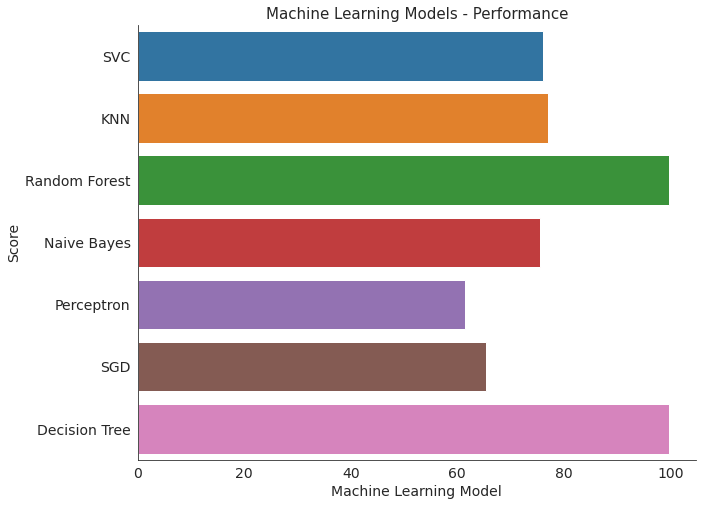

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(y='Model', x='Score', data=models.reset_index(), ax=ax)
ax.set_title("Machine Learning Models - Performance", fontsize=15)
ax.set_ylabel("Score")
ax.set_xlabel("Machine Learning Model")
ax.set_yticklabels(models.Model)
plt.show()

We present our submissions in the form of a dataset. 

Dataset is comprised of the ID of the device and the price range it fits into. 

In [33]:
# convert the submission into a csv file
submission = pd.DataFrame({
        "id": test["id"],
        "price_range": Y_pred
    })
submission.to_csv("Predictions_Mobile_Price_Classification.csv")

# Thank You!

Do kindly leave your suggestions and inputs for this project. 